# **HOMEZILLA**

ATRAER A LOS COMPRADORES CON MEJORES FOTOS


# **Objetivo**
-------------------------

El propósito fundamental de este caso es que Sandy Ward, el fundador y CEO de HomeZilla, está evaluando cómo potenciar su empresa mediante el análisis de datos de navegación web. HomeZilla se dedica a ofrecer servicios de listado de propiedades en línea para agentes inmobiliarios, y la meta específica es entender las preferencias de los usuarios en relación con las imágenes de las propiedades. El objetivo principal es determinar cuáles son las fotos más atractivas para los usuarios, medido por el tiempo que dedican a visualizarlas, y utilizar este conocimiento para mejorar la capacidad de atracción de compradores de viviendas en el sitio web de la empresa.

# **Diccionario de datos**
-------------------------
El conjunto de datos tiene los siguientes atributos:

- Web ID: Identificación única del cliente
- Time Viewed: Es la resta del tiempo mostrado en la celda anterior con la celda focal, con lo que se obtiene el número de segundos para la foto focal.
- Timestamp: Muestra la marca de tiempo de entrada para la siguiente foto completa visualizada en un acceso por el mismo usuario.
- Direction: Indica la dirección en la que se accede a cada foto en relación con la foto vista anteriormente.
- Photo ID: El nombre del archivo único para cada foto en la base de datos.
- Photo tag 1: Etiqueta de primer nivel, nivel general, indica el contenido de un interior, exterior o un plano.
- Photo tag 2: Etiqueta de segundo nivel, indica las funciones de la habitación o el espacio, por ejemplo, dormitorio, salón, cocina.
- Photo tag 3 hasta Photo tag 8: Etiquetas de tercer nivel, enumeran los elementos de la fotos, es decir, frigorífico, Lavavajillas y chimenea.
- User Agent: El SO del dispositivo y el navegador del usuario.
- Customer ID: La dirección IP del usuario.


## **Importación de datos**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data_1=pd.read_excel('/content/drive/MyDrive/BUSSINESS INTELLIGENCE/Business Analytics Introduction/Sesión 4/W16604-XLS-ENG.xlsx', sheet_name='Browsing Data')
data_2=pd.read_excel('/content/drive/MyDrive/BUSSINESS INTELLIGENCE/Business Analytics Introduction/Sesión 4/W16604-XLS-ENG.xlsx', sheet_name='62 Listing Properties')
data_inicial=data_1.merge(data_2,on='Web ID')
data_inicial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29491 entries, 0 to 29490
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Web ID       29491 non-null  object        
 1   Time Viewed  29491 non-null  int64         
 2   Timestamp    27663 non-null  datetime64[ns]
 3   Direction    27513 non-null  object        
 4   Photo ID     29491 non-null  object        
 5   Photo Tag 1  29491 non-null  object        
 6   Photo Tag 2  29491 non-null  object        
 7   Photo Tag 3  18445 non-null  object        
 8   Photo Tag 4  9856 non-null   object        
 9   Photo Tag 5  5860 non-null   object        
 10  Photo Tag 6  3711 non-null   object        
 11  Photo Tag 7  2298 non-null   object        
 12  Photo Tag 8  985 non-null    object        
 13  User Agent   29491 non-null  object        
 14  Customer ID  29491 non-null  int64         
 15  type         29491 non-null  object        
 16  subt

Observaciones:

Las columnas Timestamp, Direction, Photo Tag 3-8 y subtype tienen muchos valores nulos pero las demas variables presentan 29491 valores no nulos. En este caso, nuestra variable principal es la variable Time Viewed, la cual no presenta valores nulos.

Proseguimos verificando los valores duplicados.

In [ ]:
#Validando registros duplicados
data_inicial[data_inicial.duplicated()]

,Web ID,Time Viewed,Timestamp,Direction,Photo ID,Photo Tag 1,Photo Tag 2,Photo Tag 3,Photo Tag 4,Photo Tag 5,...,Customer ID,type,subtype,sqfoot,bedrooms,bathrooms,half baths,price,status,last update
377,F1410261,0,NaT,right,http://images.homezilla.ca/img/26/260938170_2.jpg,interior,living,living-fireplace,living-window,NaN,...,178796,house,Single Family Detached,4115,3,4,0,1050000,STACT,2014-07-09 155732
3234,V1089633,0,NaT,right,http://images.homezilla.ca/img/26/261309978_1.jpg,interior,bedroom,master-bed,NaN,NaN,...,114472,house,Condo Apartment,990,2,2,0,199900,STACT,2014-10-10 152509
3888,V1089633,0,NaT,right,http://images.homezilla.ca/img/26/261309978_15...,floor,picture-floor,NaN,NaN,NaN,...,639147,house,Condo Apartment,990,2,2,0,199900,STACT,2014-10-10 152509
6067,V1083939,0,NaT,right,http://images.homezilla.ca/img/26/261235936_1.jpg,exterior,front,driveway,NaN,NaN,...,270040,house,Single Family Detached,1975,3,3,0,598800,STINA,2014-09-20 134114
6314,V1083939,0,NaT,right,http://images.homezilla.ca/img/26/261235936_20...,exterior,back-yard,NaN,NaN,NaN,...,806300,house,Single Family Detached,1975,3,3,0,598800,STINA,2014-09-20 134114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28565,V1086934,0,NaT,right,http://images.homezilla.ca/img/26/261274269_10...,exterior,front,NaN,NaN,NaN,...,254371,house,Townhouse,1411,3,3,0,459900,STINA,2014-10-07 142022
28753,V1086934,0,NaT,right,http://images.homezilla.ca/img/26/261274269_2.jpg,interior,living,living-couch,living-fireplace,NaN,...,254371,house,Townhouse,1411,3,3,0,459900,STINA,2014-10-07 142022
28774,V1086934,0,NaT,right,http://images.homezilla.ca/img/26/261274269_2.jpg,interior,living,living-couch,living-fireplace,NaN,...,254371,house,Townhouse,1411,3,3,0,459900,STINA,2014-10-07 142022
29293,F1415727,0,NaT,right,http://images.homezilla.ca/img/26/261076910_1.jpg,exterior,front,NaN,NaN,NaN,...,365273,house,Single Family Detached,4300,8,5,0,780000,STACT,2014-07-31 160821


Como es posible que existan Web ID con las mismas características, no eliminamos los duplicados.

In [ ]:
#Número de observaciones y valores ausentes
data_inicial.isna().sum()

Web ID             0
Time Viewed        0
Timestamp       1828
Direction       1978
Photo ID           0
Photo Tag 1        0
Photo Tag 2        0
Photo Tag 3    11046
Photo Tag 4    19635
Photo Tag 5    23631
Photo Tag 6    25780
Photo Tag 7    27193
Photo Tag 8    28506
User Agent         0
Customer ID        0
type               0
subtype           21
sqfoot             0
bedrooms           0
bathrooms          0
half baths         0
price              0
status             0
last update        0
dtype: int64

Observaciones:

Las columnas
- Timestamp
- Direction
- Photo Tag 3-8
- Subtype
Presenta muchos valores nulos.


# **Análisis exploratorio de data**

In [ ]:
# Summary Statistics
data_inicial.describe().T

,count,mean,std,min,25%,50%,75%,max
Time Viewed,29491.0,50.131667,2461.406643,0.0,1.0,2.0,4.0,332909.0
Customer ID,29491.0,560995.033909,259957.124003,101856.0,341128.0,573800.0,783746.0,999637.0
sqfoot,29491.0,2149.788207,1333.180858,0.0,990.0,1602.0,3202.0,5656.0
bedrooms,29491.0,3.394493,1.780670,0.0,2.0,3.0,5.0,9.0
bathrooms,29491.0,2.863857,1.442140,0.0,2.0,2.0,4.0,8.0
half baths,29491.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
price,29491.0,790059.444542,688463.205351,22500.0,345900.0,579900.0,1050000.0,2798000.0


In [ ]:
columnas = data_inicial.iloc[:, 1:]

columnas.nunique()

Time Viewed      361
Timestamp      26493
Direction          2
Photo ID         978
Photo Tag 1        3
Photo Tag 2       20
Photo Tag 3       35
Photo Tag 4       30
Photo Tag 5       20
Photo Tag 6       20
Photo Tag 7       11
Photo Tag 8        7
User Agent       737
Customer ID     1630
type               2
subtype            3
sqfoot            61
bedrooms          10
bathrooms          8
half baths         1
price             59
status             2
last update       61
dtype: int64

**Observations:**

- La variable **Time Viewed** presenta un promedio de 50 para el tiempo de visita.
- Todas las variables son asimétricas.
-  Las columnas "half baths" tiene valores constantes sin variación, por lo que podemos eliminar esta columna porque no proporcionan información esencial para nuestro análisis. La columna "Customer ID", "Web ID", "Timestamp", "User Agent", y "Photo ID" también es irrelevante para nuestro análisis, por lo no dará resultados útiles.

In [ ]:
data=data_inicial.copy()

In [ ]:
columnas_a_eliminar = ['half baths', 'Customer ID', "User Agent",  "Web ID"]


data = data.drop(columns=columnas_a_eliminar)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29491 entries, 0 to 29490
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Viewed  29491 non-null  int64         
 1   Timestamp    27663 non-null  datetime64[ns]
 2   Direction    27513 non-null  object        
 3   Photo ID     29491 non-null  object        
 4   Photo Tag 1  29491 non-null  object        
 5   Photo Tag 2  29491 non-null  object        
 6   Photo Tag 3  18445 non-null  object        
 7   Photo Tag 4  9856 non-null   object        
 8   Photo Tag 5  5860 non-null   object        
 9   Photo Tag 6  3711 non-null   object        
 10  Photo Tag 7  2298 non-null   object        
 11  Photo Tag 8  985 non-null    object        
 12  type         29491 non-null  object        
 13  subtype      29470 non-null  object        
 14  sqfoot       29491 non-null  int64         
 15  bedrooms     29491 non-null  int64         
 16  bath

In [ ]:
columnas_a_convertir = ['Direction', 'Photo Tag 1', 'Photo Tag 2','Photo Tag 3','Photo Tag 4','Photo Tag 5','Photo Tag 6','Photo Tag 7','Photo Tag 8','type','subtype','status']
# Cambiar el tipo de dato de las columnas a categórico
data[columnas_a_convertir] = data[columnas_a_convertir].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29491 entries, 0 to 29490
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Viewed  29491 non-null  int64         
 1   Timestamp    27663 non-null  datetime64[ns]
 2   Direction    27513 non-null  category      
 3   Photo ID     29491 non-null  object        
 4   Photo Tag 1  29491 non-null  category      
 5   Photo Tag 2  29491 non-null  category      
 6   Photo Tag 3  18445 non-null  category      
 7   Photo Tag 4  9856 non-null   category      
 8   Photo Tag 5  5860 non-null   category      
 9   Photo Tag 6  3711 non-null   category      
 10  Photo Tag 7  2298 non-null   category      
 11  Photo Tag 8  985 non-null    category      
 12  type         29491 non-null  category      
 13  subtype      29470 non-null  category      
 14  sqfoot       29491 non-null  int64         
 15  bedrooms     29491 non-null  int64         
 16  bath

# **Datos atípicos**

**Time Viewed**

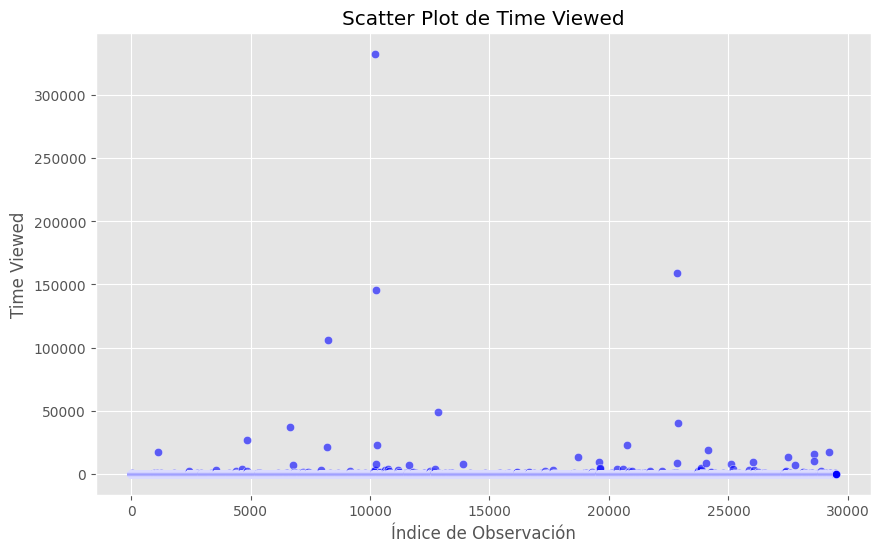

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_inicial.index, y=data_inicial['Time Viewed'], color='blue', alpha=0.6)
plt.title('Scatter Plot de Time Viewed')
plt.xlabel('Índice de Observación')
plt.ylabel('Time Viewed')
plt.show()

Se observa que los valores del tiempo de visualización, tienen muchos valores atípicos, si deseamos saber en profundidad, el análisis a continuación proporciona información más detallada.

In [ ]:
outliers_indexes = []
target = 'Time Viewed'

for col in data_inicial.select_dtypes(include='object').columns:
    for cat in data_inicial[col].unique():
        df1 = data_inicial[data_inicial[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())


for col in data_inicial.select_dtypes(exclude='object').columns:
    q1 = data_inicial[col].quantile(0.25)
    q3 = data_inicial[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = data_inicial[(data_inicial[col] < minimum) | (data_inicial[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))



8190 outliers were identified, whose indices are:

[0, 6, 25, 26, 27, 30, 32, 34, 35, 38, 46, 47, 48, 49, 50, 51, 62, 68, 73, 76, 78, 80, 86, 93, 95, 97, 98, 100, 123, 132, 133, 137, 139, 144, 147, 154, 157, 177, 179, 193, 194, 196, 197, 199, 201, 216, 219, 221, 237, 258, 260, 262, 266, 268, 269, 274, 281, 289, 295, 297, 301, 307, 316, 318, 322, 333, 350, 352, 357, 358, 360, 361, 364, 367, 370, 378, 387, 390, 392, 411, 413, 415, 416, 420, 426, 427, 433, 453, 473, 475, 480, 482, 490, 492, 494, 506, 509, 516, 517, 527, 530, 537, 558, 573, 592, 599, 601, 622, 628, 629, 632, 636, 643, 648, 674, 675, 676, 679, 685, 708, 709, 715, 716, 717, 720, 735, 736, 737, 741, 745, 747, 761, 763, 766, 770, 778, 783, 794, 817, 836, 837, 850, 852, 853, 855, 856, 857, 858, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 872, 873, 875, 877, 891, 892, 893, 897, 900, 911, 929, 931, 934, 936, 938, 940, 942, 943, 944, 949, 952, 957, 958, 972, 973, 975, 977, 990, 992, 998, 999, 1018, 1022, 1026, 1039, 1042, 10

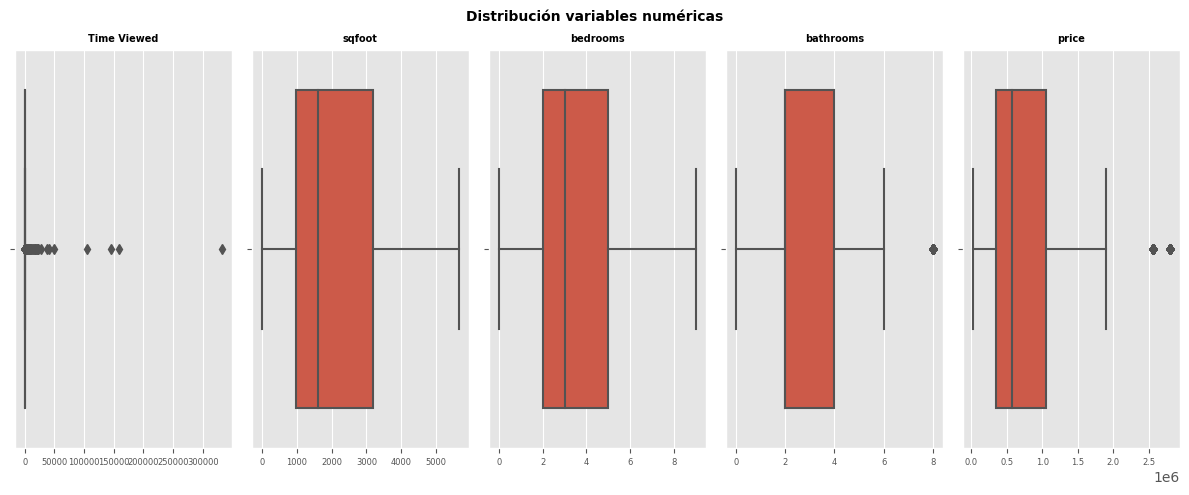

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 5))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(data=data, x=colum, ax=axes[i])
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight="bold")
plt.show()

Se observa que hay demasiado valores atípicos presentes en la variable Time Viewed, además se encuentre algunos outlier en la variable price y bathrooms.

Se realiza también un estudio de los outliers identificados en las variables categóricas.

In [ ]:
numeric_columns = data.select_dtypes(exclude=['category', 'datetime64', 'object']).columns

outliers_indexes = []
for col in numeric_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = data[(data[col] < minimum) | (data[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))


6920 outliers were identified, whose indices are:

[0, 6, 25, 26, 27, 30, 32, 34, 35, 38, 46, 47, 48, 50, 62, 68, 73, 76, 78, 80, 86, 95, 98, 123, 133, 137, 139, 147, 154, 157, 177, 179, 194, 196, 219, 221, 237, 258, 260, 262, 266, 268, 269, 274, 281, 289, 295, 297, 301, 307, 316, 318, 322, 350, 352, 357, 358, 360, 364, 367, 370, 378, 387, 390, 392, 411, 413, 415, 416, 420, 426, 427, 453, 473, 475, 480, 482, 492, 494, 506, 517, 527, 537, 558, 573, 599, 622, 628, 629, 632, 636, 643, 648, 674, 675, 676, 679, 685, 708, 709, 715, 716, 717, 720, 735, 736, 741, 745, 747, 763, 766, 783, 794, 817, 837, 850, 852, 853, 855, 856, 857, 858, 860, 861, 864, 865, 866, 867, 868, 869, 872, 873, 875, 877, 891, 892, 893, 897, 931, 934, 936, 958, 972, 973, 975, 977, 990, 998, 999, 1018, 1042, 1043, 1049, 1051, 1058, 1059, 1063, 1065, 1066, 1067, 1083, 1084, 1085, 1086, 1087, 1095, 1113, 1115, 1118, 1119, 1121, 1136, 1137, 1141, 1148, 1169, 1170, 1172, 1176, 1187, 1202, 1205, 1215, 1238, 1259, 1273, 1280, 

In [ ]:
removing_indexes = list(set(outliers_indexes))
removing_indexes

[0,
 6,
 25,
 26,
 27,
 30,
 32,
 34,
 35,
 38,
 46,
 47,
 48,
 50,
 62,
 68,
 73,
 76,
 78,
 80,
 86,
 95,
 98,
 123,
 133,
 137,
 139,
 147,
 154,
 157,
 177,
 179,
 194,
 196,
 219,
 221,
 237,
 258,
 260,
 262,
 266,
 268,
 269,
 274,
 281,
 289,
 295,
 297,
 301,
 307,
 316,
 318,
 322,
 350,
 352,
 357,
 358,
 360,
 364,
 367,
 370,
 378,
 387,
 390,
 392,
 411,
 413,
 415,
 416,
 420,
 426,
 427,
 453,
 473,
 475,
 480,
 482,
 492,
 494,
 506,
 517,
 527,
 537,
 558,
 573,
 599,
 622,
 628,
 629,
 632,
 636,
 643,
 648,
 674,
 675,
 676,
 679,
 685,
 708,
 709,
 715,
 716,
 717,
 720,
 735,
 736,
 741,
 745,
 747,
 763,
 766,
 783,
 794,
 817,
 837,
 850,
 852,
 853,
 855,
 856,
 857,
 858,
 860,
 861,
 864,
 865,
 866,
 867,
 868,
 869,
 872,
 873,
 875,
 877,
 891,
 892,
 893,
 897,
 931,
 934,
 936,
 958,
 972,
 973,
 975,
 977,
 990,
 998,
 999,
 1018,
 1042,
 1043,
 1049,
 1051,
 1058,
 1059,
 1063,
 1065,
 1066,
 1067,
 1083,
 1084,
 1085,
 1086,
 1087,
 1095,
 1113,
 1115

Se procede a remover los outliers

In [ ]:
df1 = data.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22571 entries, 0 to 22570
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Viewed  22571 non-null  int64         
 1   Timestamp    20888 non-null  datetime64[ns]
 2   Direction    22213 non-null  category      
 3   Photo ID     22571 non-null  object        
 4   Photo Tag 1  22571 non-null  category      
 5   Photo Tag 2  22571 non-null  category      
 6   Photo Tag 3  14280 non-null  category      
 7   Photo Tag 4  7560 non-null   category      
 8   Photo Tag 5  4508 non-null   category      
 9   Photo Tag 6  3083 non-null   category      
 10  Photo Tag 7  1843 non-null   category      
 11  Photo Tag 8  724 non-null    category      
 12  type         22571 non-null  category      
 13  subtype      22555 non-null  category      
 14  sqfoot       22571 non-null  int64         
 15  bedrooms     22571 non-null  int64         
 16  bath

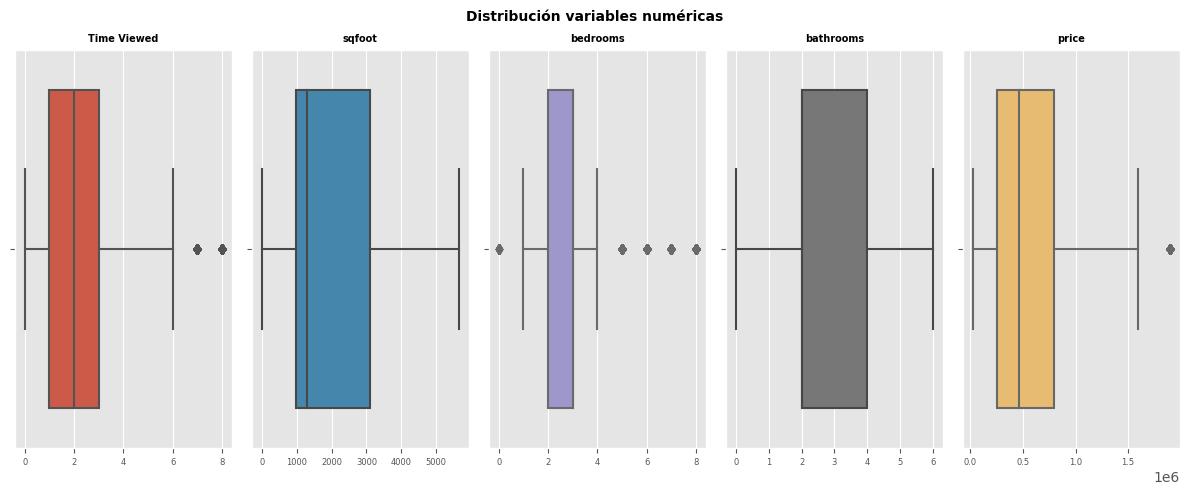

In [ ]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 5))
axes = axes.flat
columnas_numeric = df1.select_dtypes(include=['float64', 'int64']).columns


for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data    = df1,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Al remover los valores atípicos, se observa que la variable Time Viewed ya se puede trabajar, dado que no encontramos tantos outliers, si esto se mantenía nuestros resultados del análisis carecerían de confiabilidad.

# **Análisis Descriptivo**

### **Analisis de variables cualitativas**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22571 entries, 0 to 22570
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Viewed  22571 non-null  int64         
 1   Timestamp    20888 non-null  datetime64[ns]
 2   Direction    22213 non-null  category      
 3   Photo ID     22571 non-null  object        
 4   Photo Tag 1  22571 non-null  category      
 5   Photo Tag 2  22571 non-null  category      
 6   Photo Tag 3  14280 non-null  category      
 7   Photo Tag 4  7560 non-null   category      
 8   Photo Tag 5  4508 non-null   category      
 9   Photo Tag 6  3083 non-null   category      
 10  Photo Tag 7  1843 non-null   category      
 11  Photo Tag 8  724 non-null    category      
 12  type         22571 non-null  category      
 13  subtype      22555 non-null  category      
 14  sqfoot       22571 non-null  int64         
 15  bedrooms     22571 non-null  int64         
 16  bath

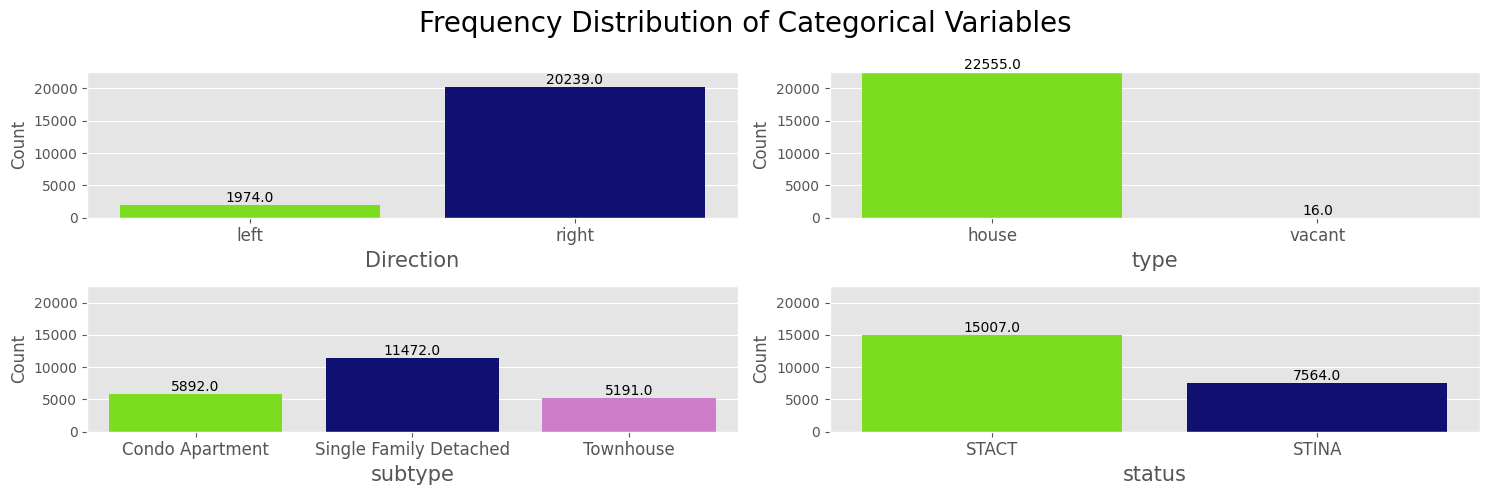

In [ ]:
# Seleccionar las columnas categóricas, en este caso seleccionaremos estas 4.

CatCols = df1[['Direction', 'type', 'subtype', 'status']].columns

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 5), dpi=100)

colors = ['lawngreen', 'navy', 'orchid']
sns.set_palette(sns.color_palette(colors))

# Iterar sobre las columnas categóricas
for i, col in enumerate(CatCols):
    # Crear un gráfico de conteo para cada columna categórica
    graph = sns.countplot(x=col, data=df1, ax=ax[i // 2, i % 2])

    # Configuración del gráfico
    ax[i // 2, i % 2].set_xlabel(col, fontsize=15)
    ax[i // 2, i % 2].set_ylabel('Count', fontsize=12)
    ax[i // 2, i % 2].set_ylim([0, len(df1)])
    ax[i // 2, i % 2].tick_params(axis='x', labelsize=12)

    # Etiquetas con recuento en las barras
    for p in graph.patches:
        height = p.get_height()
        ax[i // 2, i % 2].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                   textcoords='offset points')

# Ajustes de diseño
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20)
plt.tight_layout()
plt.show()


Conclusión:
1. Direction:

Existen 2 categorías de dirección. La dirección "derecha" es la opción más frecuente.

2. Type:

Hay 2 categorías para el tipo, y la opción "house" es la más frecuente.

3. Tipos de transmisión:

Existen 3 tipos de tipos de transmisión. La Vivienda Unifamiliar Independiente ("Single Family Detached") tiene la mayor frecuencia, y la casa adosada ("Townhouse") tiene la menor frecuencia.

4. Status

Presenta 2 categorías para el estatus, la cual el estado STACT es el que presenta una frecuenta mayor

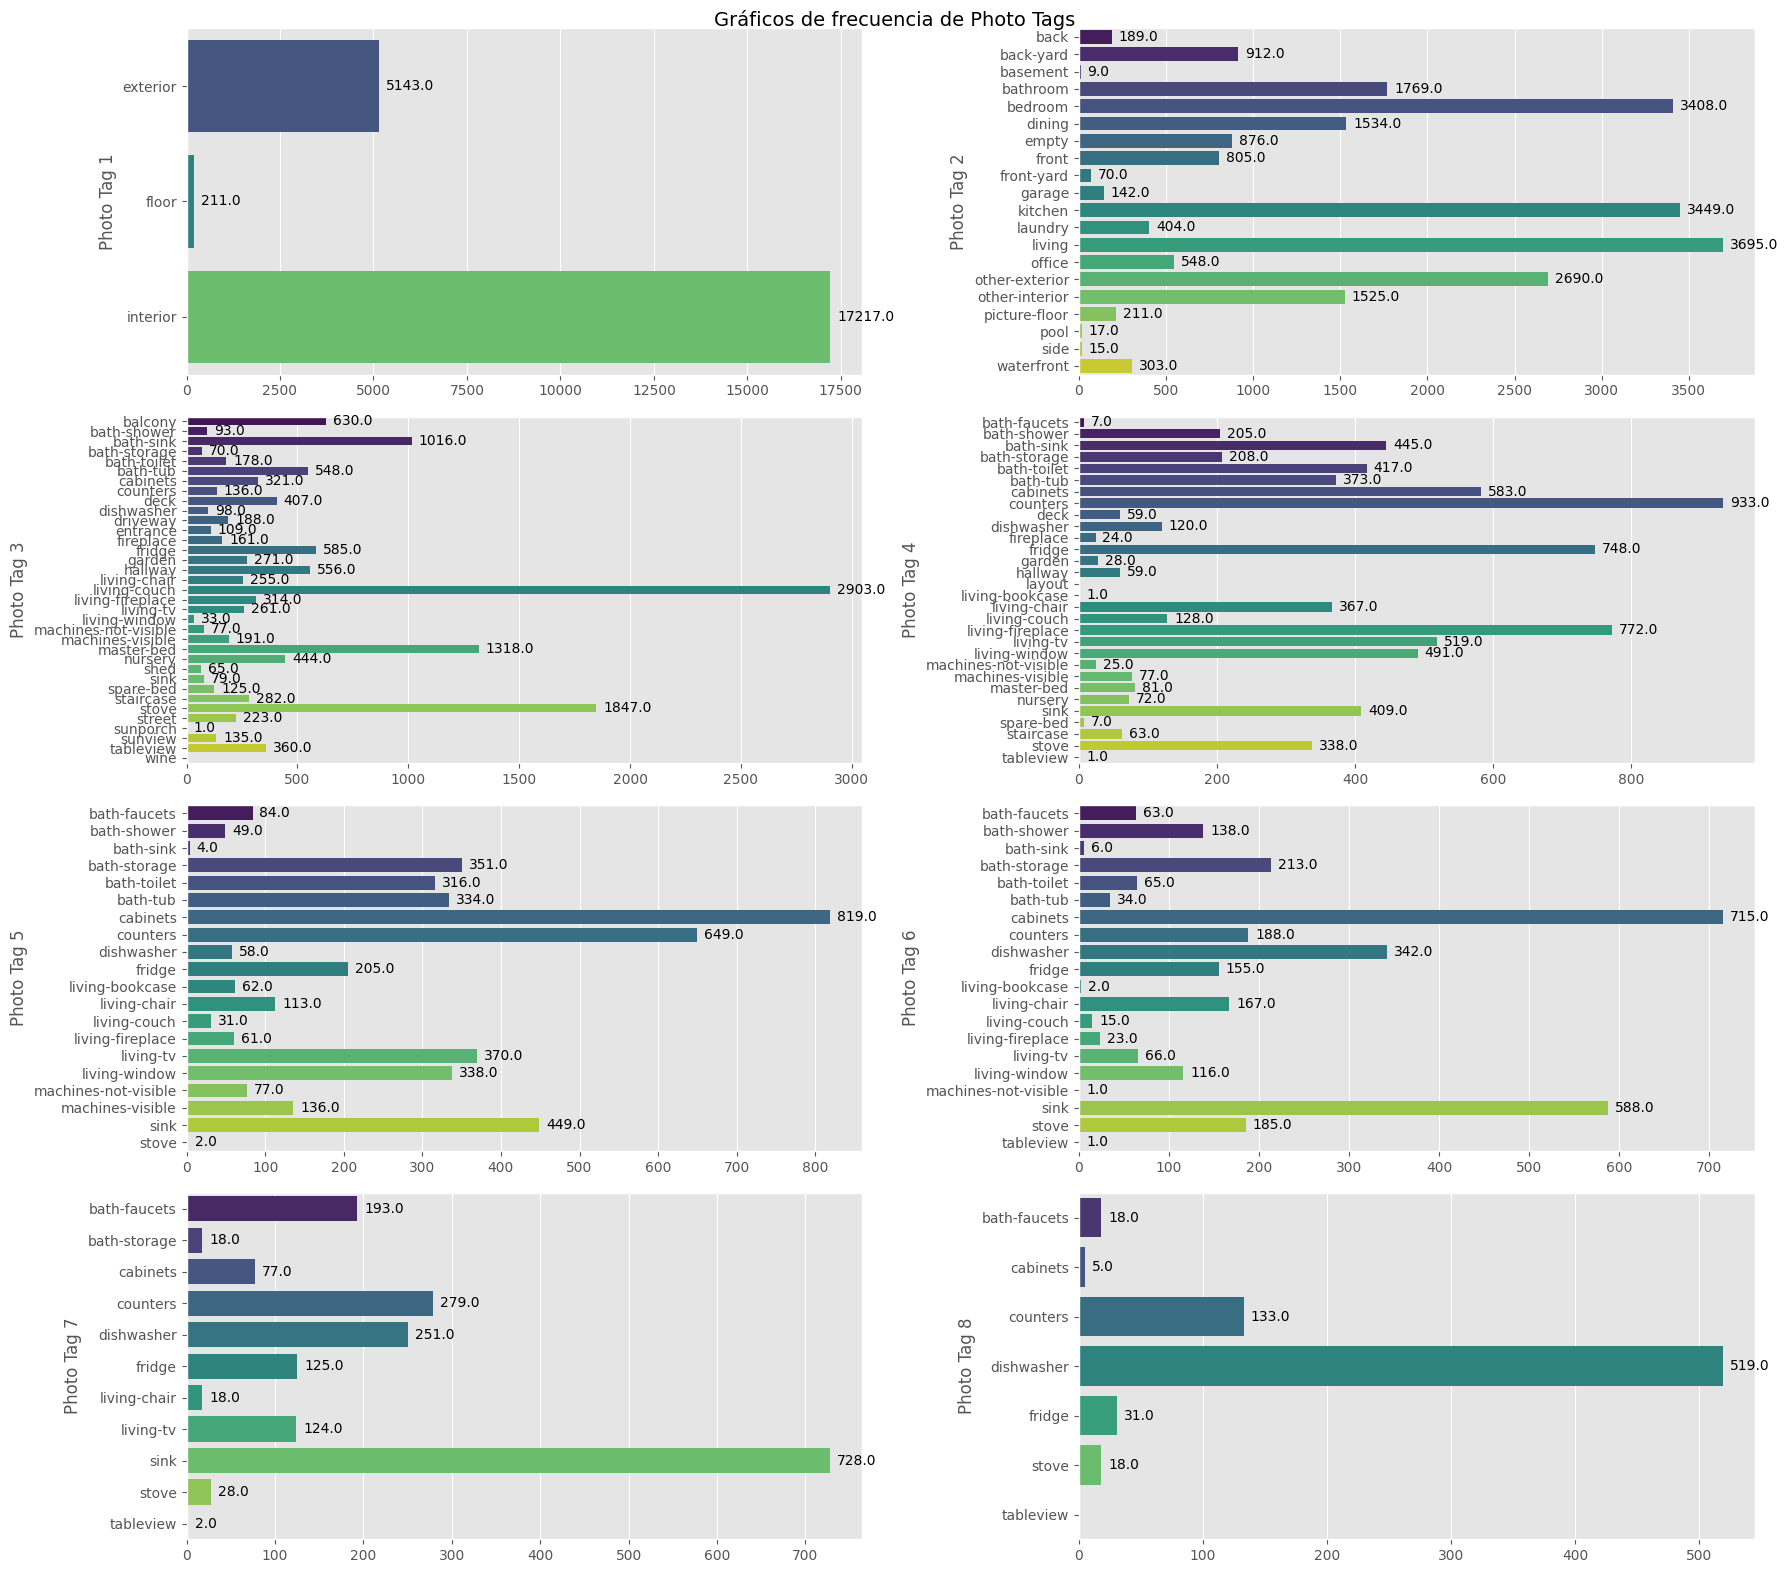

In [ ]:
# Seleccionar las columnas de etiquetas de fotos
PhotoTagCols = df1[['Photo Tag 1', 'Photo Tag 2', 'Photo Tag 3', 'Photo Tag 4', 'Photo Tag 5', 'Photo Tag 6', 'Photo Tag 7', 'Photo Tag 8']]

# Obtener la cantidad total de columnas
num_cols = len(PhotoTagCols.columns)

# Calcular la cantidad de filas necesarias
num_rows = (num_cols + 1) // 2

# Ajustar el número de filas a 4
num_rows = min(4, num_rows)

# Crear figura y ejes con dos columnas y cuatro filas
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(18, num_rows * 4), dpi=100)

# Iterar sobre las columnas de etiquetas de fotos
for i, col in enumerate(PhotoTagCols.columns):
    # Calcular la posición en la cuadrícula
    row = i // 2
    col_index = i % 2

    # Filtrar las categorías que tienen valores mayores a 0
    non_zero_categories = df1[col].value_counts()[df1[col].value_counts() > 0]

    # Crear un gráfico de barras horizontales para las categorías con valores mayores a 0
    graph = sns.barplot(y=non_zero_categories.index, x=non_zero_categories.values, ax=ax[row, col_index], palette='viridis')

    # Configuración del gráfico
    ax[row, col_index].set_ylabel(col, fontsize=12)

    # Etiquetas con recuento en las barras
    for p in graph.patches:
        width = p.get_width()
        ax[row, col_index].annotate(f'{width}', (width, p.get_y() + p.get_height() / 2.),
                                     ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                                     textcoords='offset points')

# Ajustes de diseño
plt.suptitle('Gráficos de frecuencia de Photo Tags', fontsize=14)
plt.tight_layout()
plt.show()


5. Photo Tag 1:

Existen 3 categorías para el Photo Tag 1, la mayor frecuencia lo presenta la opción interior y la menor frecuencia la opción de floor.

6. Photo Tag 2:

Se observan muchas categorías para el Photo Tag 2, la mayor frecuencia es para las fotos del livinf y la menor frecuencia para el basement.

7. Photo Tag 3:

Presenta mas de 10 categorías para el Photo Tag 3, la mayor frecuencia es para las fotos del living-chan y la menor frecuencia para el liviing-window.

8. Photo Tag 4:

La mayor frecuencia en el phot tag 4 es para las fotos de "counters" y la menor frecuencia para el "layout".

9. Photo Tag 5:

La mayor frecuencia lo presenta la opcion de "cabinets", en cambio la menor frecuencia es de "stove"

10. Photo Tag 6:

En el caso del photo tag 6, las fotos de "cabinets" son las que tienen mayor frecuencia  a comparación de las demás categorías.

11. Photo Tag 7:

En el photo tag 7, las fotoss del "sink" son las que presenta mayor frecuencia, y las fotos de "tableviews" tienen la menor frecuencia

12. Photo Tag 8:

La categoría mas frecuente para el Photo Tag 8 es la del dishwater, y la menos frecuente son las fotos del "tableview"

### **Análisis univariante de variables numéricas**

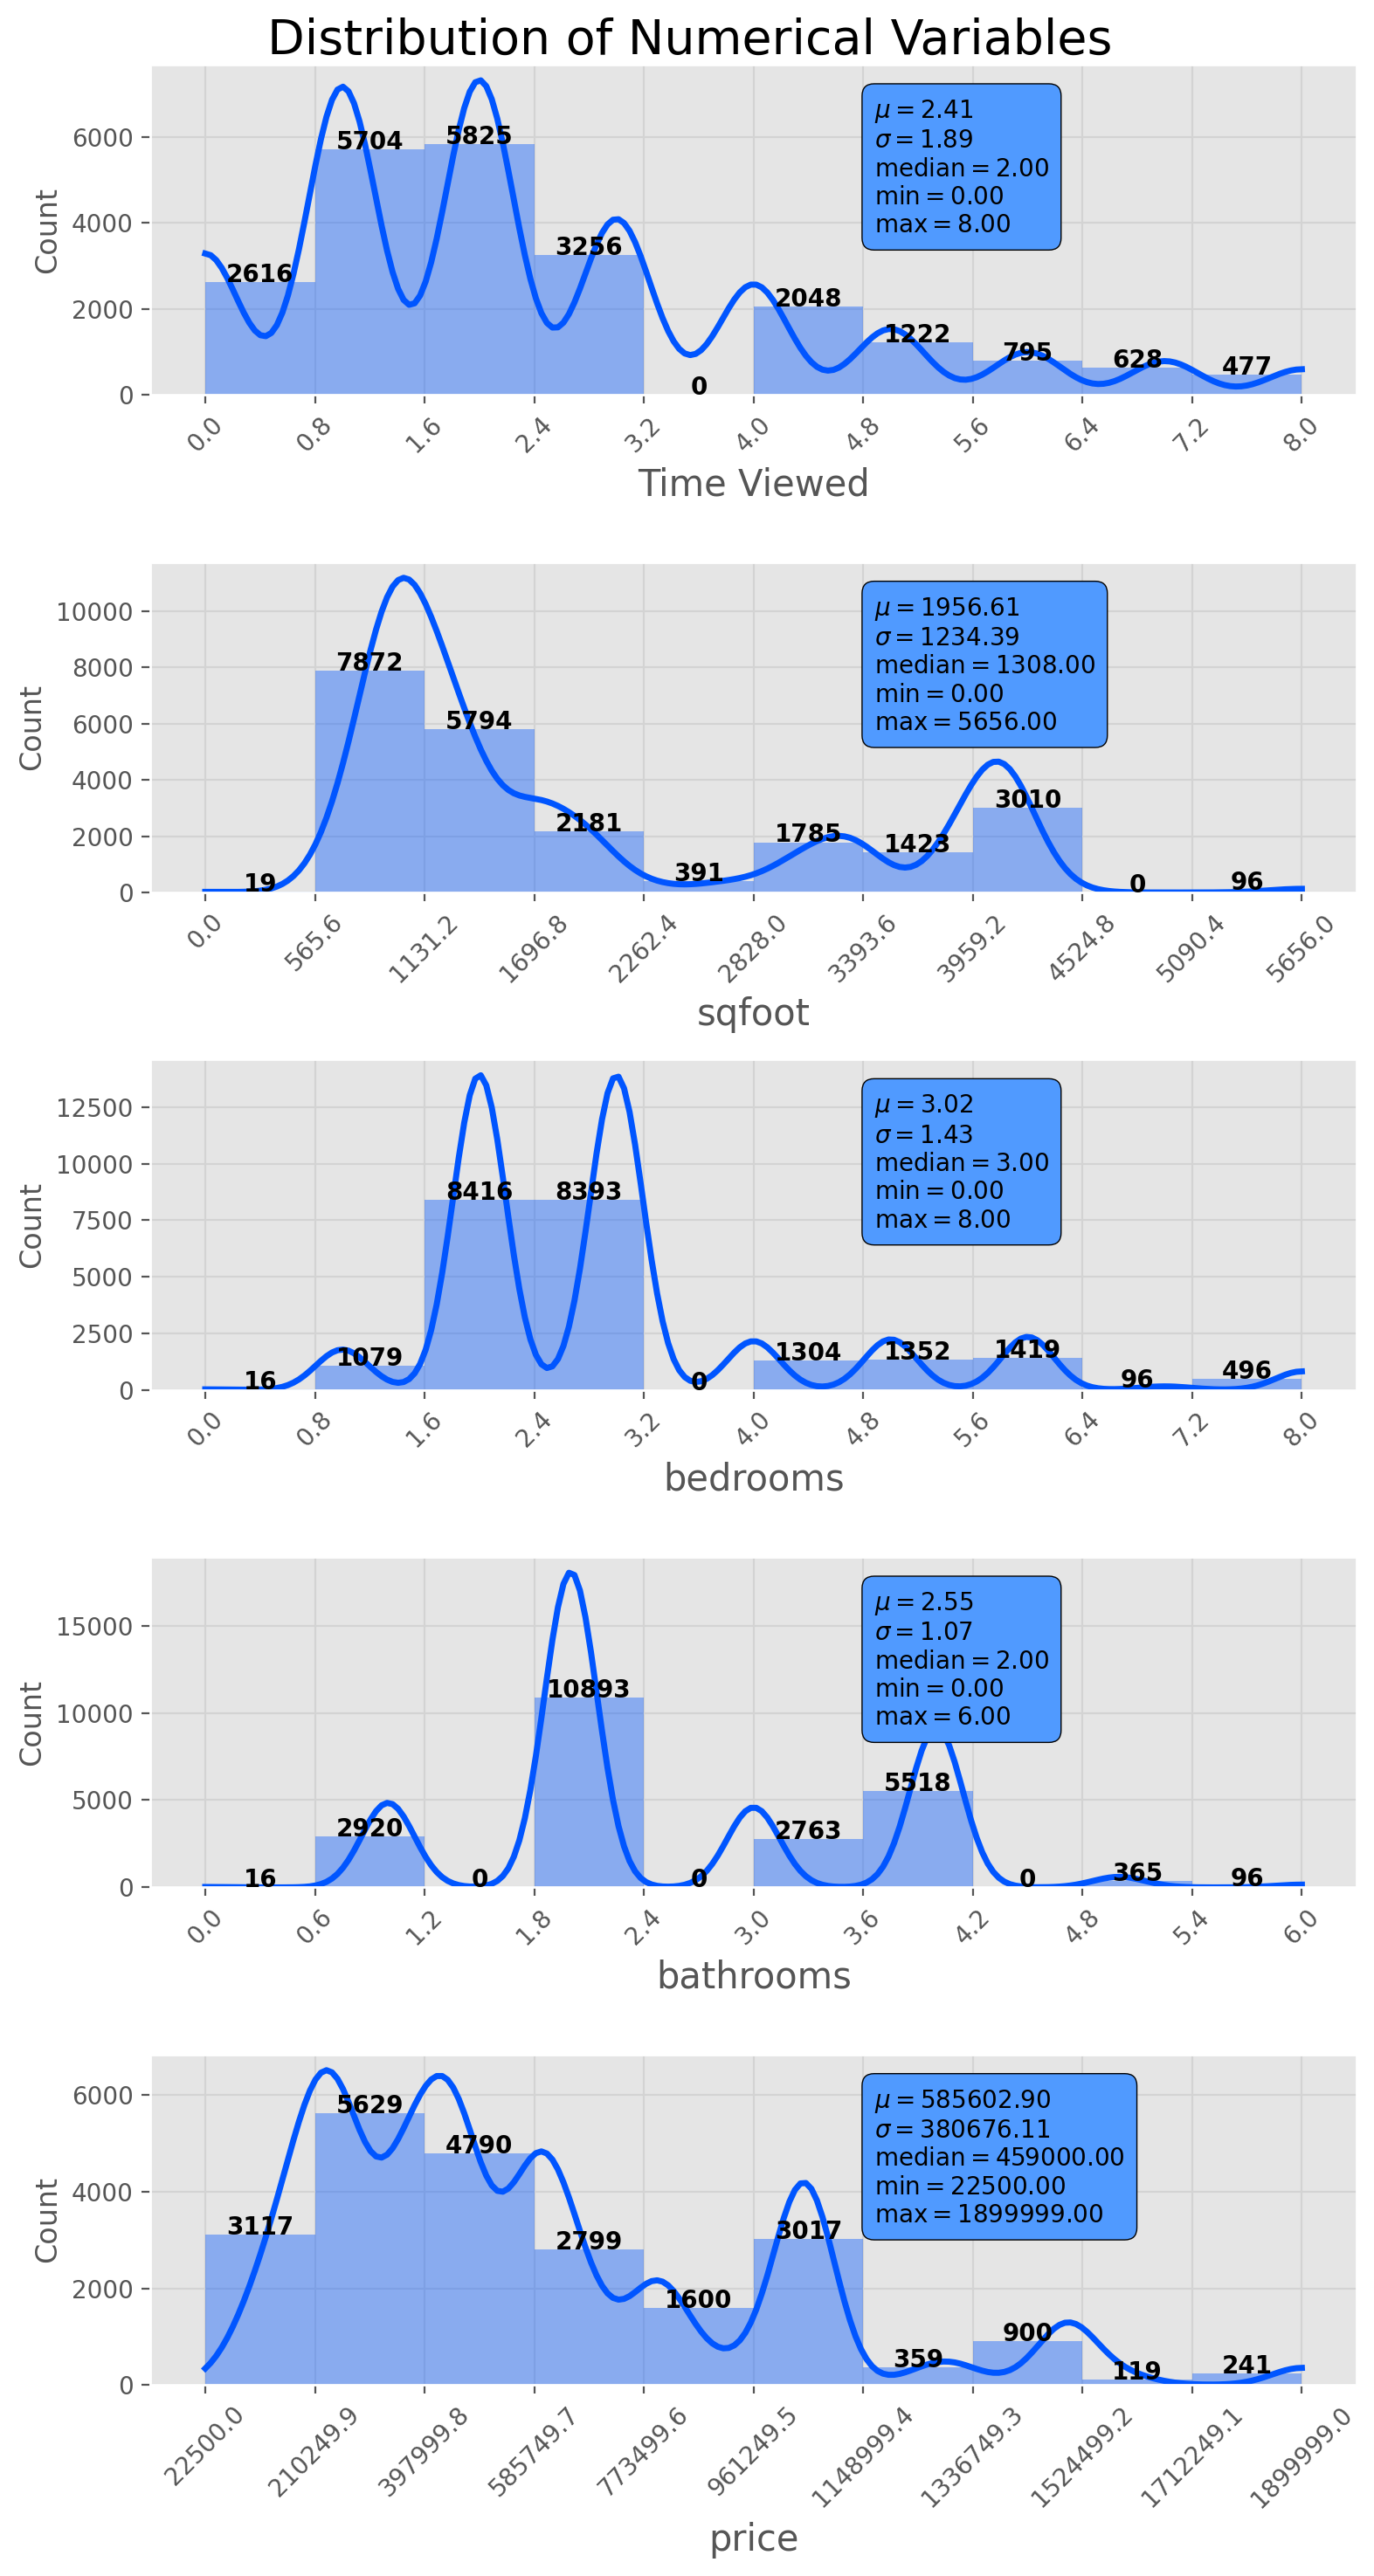

In [ ]:
# Seleccionar las columnas numéricas
NumCols = df1.select_dtypes(include=['float64', 'int64']).columns

# Crear figura y ejes con una columna y cinco filas
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8, 15), dpi=200)
c = '#0055ff'

for i in range(len(NumCols)):
    values, bin_edges = np.histogram(df1[NumCols[i]],
                                     range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))
    graph = sns.histplot(data=df1, x=NumCols[i], bins=bin_edges, kde=True, ax=ax[i],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[i].set_xlabel(NumCols[i], fontsize=15)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_xticks(np.round(bin_edges, 1))
    ax[i].set_xticklabels(ax[i].get_xticks(), rotation=45)
    ax[i].grid(color='lightgrey')
    for j, p in enumerate(graph.patches):
        ax[i].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                       ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df1[NumCols[i]].mean(),
        r'$\sigma=%.2f$' % df1[NumCols[i]].std(),
        r'$\mathrm{median}=%.2f$' % np.median(df1[NumCols[i]]),
        r'$\mathrm{min}=%.2f$' % df1[NumCols[i]].min(),
        r'$\mathrm{max}=%.2f$' % df1[NumCols[i]].max()
    ))
    ax[i].text(0.6, 0.9, textstr, transform=ax[i].transAxes, fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='#509aff', edgecolor='black', pad=0.5))

plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show()


El tiempo superior a  3 segundos según Sandy, demuestra que hay interés, pero se observa que el tiempo de visita en promedio es de 2 segundos.

# **PREGUNTAS:**
-------------------------



### 1. ¿Es importante la secuencia de fotos?

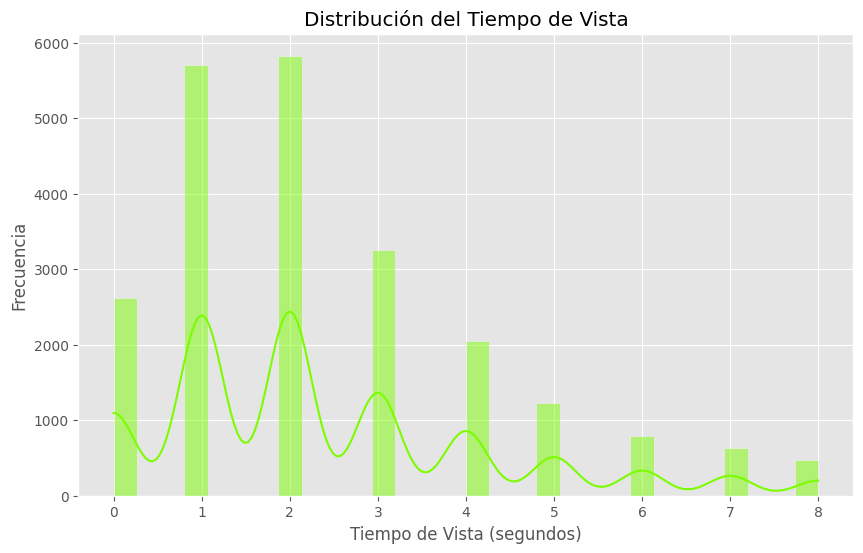

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df1['Time Viewed'], bins=30, kde=True)
plt.title('Distribución del Tiempo de Vista')
plt.xlabel('Tiempo de Vista (segundos)')
plt.ylabel('Frecuencia')
plt.show()

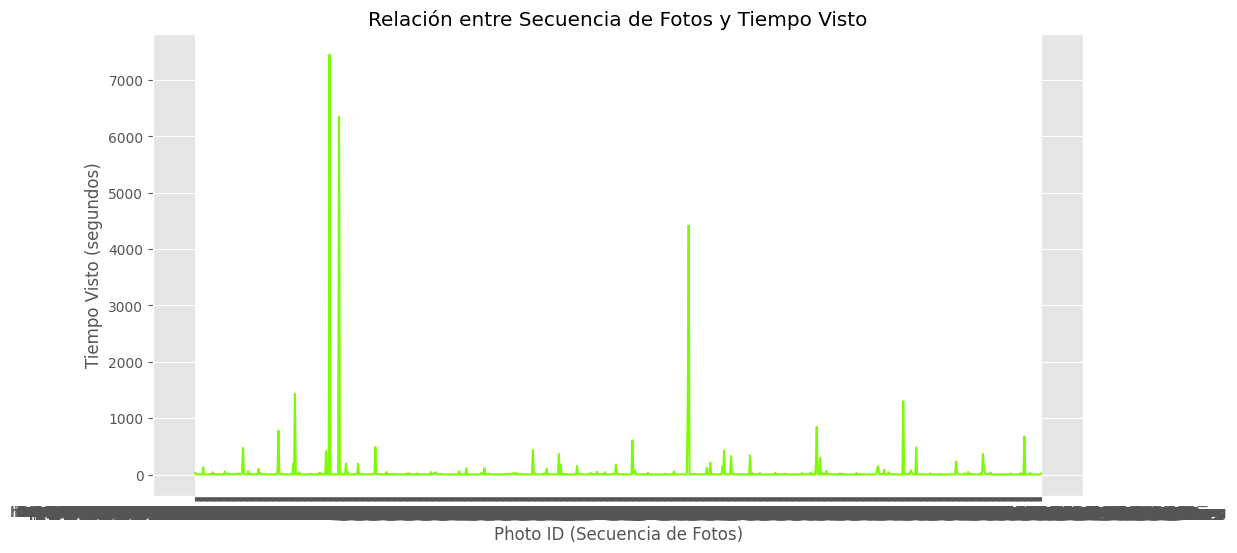

In [ ]:
# Visualizamos de la secuencia de fotos con la data original sin eliminar los outliers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Photo ID', y='Time Viewed', data=data, ci=None)
plt.title('Relación entre Secuencia de Fotos y Tiempo Visto')
plt.xlabel('Photo ID (Secuencia de Fotos)')
plt.ylabel('Tiempo Visto (segundos)')
plt.show()


En el gráfico se observa la secuencia de fotos representada por la variable Photo ID, en relación con el tiempo visto que se demora en cada foto, sin eliminar los outlier, se observa cambios bruscos en el tiempo visto que podrían indicar puntos de interés, dado que el tiempo visto es mucho mayor a comparación de otros momentos. Pero no presenta una tendencia general de aumento o disminución en el tiempo.

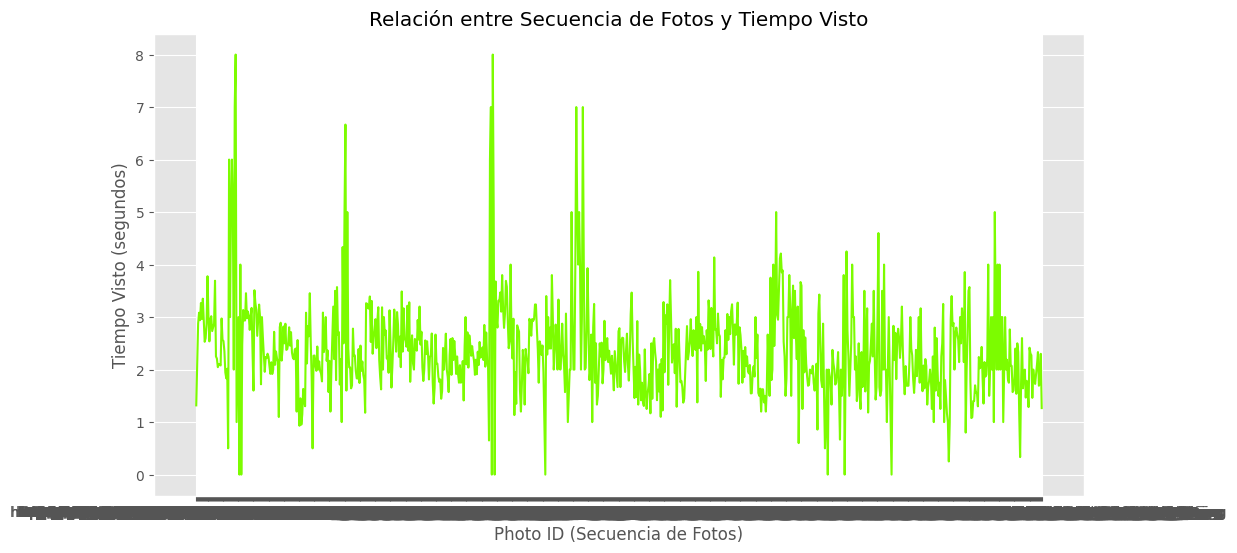

In [ ]:
# Visualizamos de la secuencia de fotos
plt.figure(figsize=(12, 6))
sns.lineplot(x='Photo ID', y='Time Viewed', data=df1, ci=None)
plt.title('Relación entre Secuencia de Fotos y Tiempo Visto')
plt.xlabel('Photo ID (Secuencia de Fotos)')
plt.ylabel('Tiempo Visto (segundos)')
plt.show()

En esta figura se trabajó con la data sin datos atípicos, en donde se observa de mejor manera los cambios bruscos en el tiempo visto que podrían indicar puntos de interés, pero llegamos a la conclusión de que no presenta una tendencia general de aumento o disminución en el tiempo.

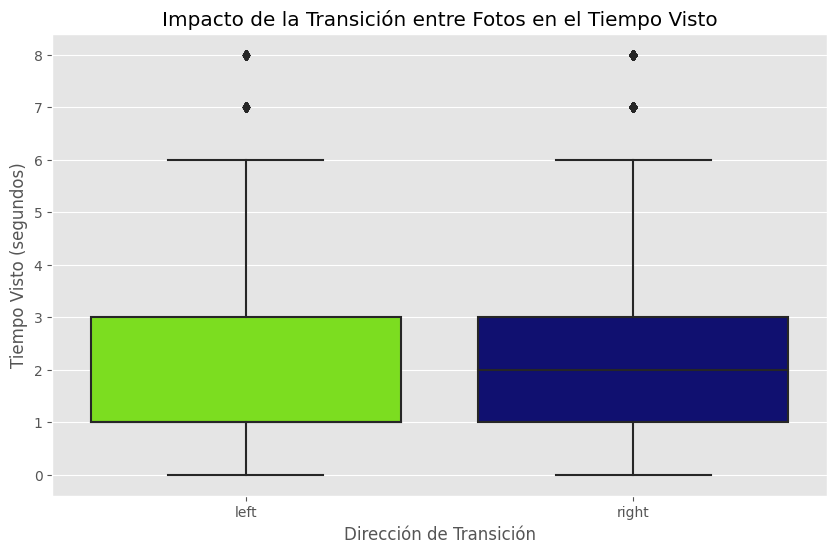

In [ ]:
# Análisis de transiciones entre fotos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Direction', y='Time Viewed', data=df1)
plt.title('Impacto de la Transición entre Fotos en el Tiempo Visto')
plt.xlabel('Dirección de Transición')
plt.ylabel('Tiempo Visto (segundos)')
plt.show()

Se observa en el gráfico que hay outliers, lo que podrían indicar transiciones particularmente efectivas o ineficaces. Por ejemplo, una transición de una foto a otra podría captar mucho la atención del usuario, mientras que otra podría resultar en una pérdida rápida de interés.

In [ ]:
from scipy.stats import ttest_ind

# Realiza la prueba t de dos muestras para comparar el tiempo de visualización entre diferentes direcciones
t_stat, p_value = ttest_ind(left_direction_data['Time Viewed'], right_direction_data['Time Viewed'])

# Evalúa el p-value para determinar si hay diferencias significativas
if p_value < 0.05:
    print("Hay diferencias significativas entre los tiempos de visualización.")
else:
    print("No hay diferencias significativas entre los tiempos de visualización.")


Hay diferencias significativas entre los tiempos de visualización.


In [ ]:
import statsmodels.api as sm
import pandas as pd


# Convertir 'Direction' en variables dummy
df_dummies = pd.get_dummies(df1['Direction'], prefix='Direction', drop_first=True)

# Concatenar las variables dummy con el DataFrame original
df_regression = pd.concat([df1['Time Viewed'], df_dummies], axis=1)

# Crear una fórmula para el modelo de regresión
formula = 'Q("Time Viewed") ~ Direction_right'

# Ajustar el modelo de regresión
model = sm.formula.ols(formula, data=df_regression).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Q("Time Viewed")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.98
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.33e-05
Time:                        15:00:15   Log-Likelihood:                -46354.
No. Observations:               22571   AIC:                         9.271e+04
Df Residuals:                   22569   BIC:                         9.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5716      0.039     

Al realizar un modelo de regresión, nuestra variable dummie de Direction_right muestra una significancia estadística en el tiempo de visita, pero el ajuste es demasiado bajo.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Supongamos que ya tienes tus datos cargados en un DataFrame llamado 'df1'
# Asegúrate de tener 'Direction' y 'Time Viewed' en el formato adecuado

# Crear una variable dicotómica para el tiempo de visita
df1['Interest'] = (df1['Time Viewed'] >= 3).astype(int)

# Crear una fórmula para el modelo de regresión logística
formula = 'Interest ~ Direction'

# Ajustar el modelo de regresión logística
model = sm.formula.logit(formula, data=df1).fit()

# Imprimir un resumen del modelo
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.654525
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Interest   No. Observations:                22213
Model:                          Logit   Df Residuals:                    22211
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                0.002473
Time:                        15:12:46   Log-Likelihood:                -14539.
converged:                       True   LL-Null:                       -14575.
Covariance Type:            nonrobust   LLR p-value:                 2.055e-17
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.9513      0.050    -18.949      0.000      -1.050      -0.853
Direc

Se convirtió la variable Time Viewed a una variable dicótoma, con el fin de realizar una regresión logistica. Se tomo en cuenta lo indicado por Sandy, que al pasar los 3 segundos del tiempo ya es un exito.

Al correr el modelo encontramos un ajuste R muy bajo.

In [ ]:
import statsmodels.api as sm

# Seleccionar las variables para el modelo
variables_predictoras = ['Direction', 'sqfoot', 'bedrooms', 'bathrooms', 'price']

# Filtrar el DataFrame para eliminar filas con valores faltantes en las variables seleccionadas
df_modelo = df1[variables_predictoras + ['Time Viewed']].dropna()

# Crear una fórmula para el modelo de regresión lineal
formula = 'Q("Time Viewed") ~ ' + ' + '.join(variables_predictoras)

# Ajustar el modelo de regresión lineal
modelo_regresion = sm.OLS.from_formula(formula, data=df_modelo).fit()

# Imprimir un resumen del modelo
print(modelo_regresion.summary())


                            OLS Regression Results                            
Dep. Variable:       Q("Time Viewed")   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     76.49
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           9.02e-80
Time:                        15:17:22   Log-Likelihood:                -44758.
No. Observations:               22213   AIC:                         8.953e+04
Df Residuals:                   22207   BIC:                         8.958e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.8070      0

Se implementó con otras variables, pero se determinó que la secuencia de datos, en este caso estudiada a través de la direccion si es relevante en el tiempo de visita, pero no lo suficiente como para explicar los datos del tiempo de visita dado que tiene un ajuste de modelo muy bajo y no aceptable.

### 2. ¿Es importante el tipo de foto?

In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para calcular el coeficiente de contingencia
contingency_table = pd.crosstab(df1['Time Viewed'], df1['Photo Tag 1'])

# Realizar prueba de chi-cuadrado para la independencia
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluar el p-value
if p < 0.05:
    print("Hay asociación significativa entre Time Viewed y Photo Tag 1.")
else:
    print("No hay asociación significativa entre Time Viewed y Photo Tag 1.")


Hay asociación significativa entre Time Viewed y Photo Tag 1.


In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para calcular el coeficiente de contingencia
contingency_table = pd.crosstab(df1['Time Viewed'], df1['Photo Tag 2'])

# Realizar prueba de chi-cuadrado para la independencia
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluar el p-value
if p < 0.05:
    print("Hay asociación significativa entre Time Viewed y Photo Tag 2.")
else:
    print("No hay asociación significativa entre Time Viewed y Photo Tag 2.")


Hay asociación significativa entre Time Viewed y Photo Tag 2.


In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para calcular el coeficiente de contingencia
contingency_table = pd.crosstab(df1['Time Viewed'], df1['Photo Tag 3'])

# Realizar prueba de chi-cuadrado para la independencia
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluar el p-value
if p < 0.05:
    print("Hay asociación significativa entre Time Viewed y Photo Tag 3.")
else:
    print("No hay asociación significativa entre Time Viewed y Photo Tag 3.")


Hay asociación significativa entre Time Viewed y Photo Tag 3.


In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para calcular el coeficiente de contingencia
contingency_table = pd.crosstab(df1['Time Viewed'], df1['Photo Tag 4'])

# Realizar prueba de chi-cuadrado para la independencia
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluar el p-value
if p < 0.05:
    print("Hay asociación significativa entre Time Viewed y Photo Tag 4.")
else:
    print("No hay asociación significativa entre Time Viewed y Photo Tag 4.")


Hay asociación significativa entre Time Viewed y Photo Tag 4.


In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para calcular el coeficiente de contingencia
contingency_table = pd.crosstab(df1['Time Viewed'], df1['Photo Tag 5'])

# Realizar prueba de chi-cuadrado para la independencia
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluar el p-value
if p < 0.05:
    print("Hay asociación significativa entre Time Viewed y Photo Tag 5.")
else:
    print("No hay asociación significativa entre Time Viewed y Photo Tag 5.")


Hay asociación significativa entre Time Viewed y Photo Tag 5.


In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para calcular el coeficiente de contingencia
contingency_table = pd.crosstab(df1['Time Viewed'], df1['Photo Tag 6'])

# Realizar prueba de chi-cuadrado para la independencia
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluar el p-value
if p < 0.05:
    print("Hay asociación significativa entre Time Viewed y Photo Tag 6")
else:
    print("No hay asociación significativa entre Time Viewed y Photo Tag 6.")

Hay asociación significativa entre Time Viewed y Photo Tag 6


In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para calcular el coeficiente de contingencia
contingency_table = pd.crosstab(df1['Time Viewed'], df1['Photo Tag 7'])

# Realizar prueba de chi-cuadrado para la independencia
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluar el p-value
if p < 0.05:
    print("Hay asociación significativa entre Time Viewed y Photo Tag 7")
else:
    print("No hay asociación significativa entre Time Viewed y Photo Tag 7.")

Hay asociación significativa entre Time Viewed y Photo Tag 7


In [ ]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para calcular el coeficiente de contingencia
contingency_table = pd.crosstab(df1['Time Viewed'], df1['Photo Tag 8'])

# Realizar prueba de chi-cuadrado para la independencia
chi2, p, _, _ = chi2_contingency(contingency_table)

# Evaluar el p-value
if p < 0.05:
    print("Hay asociación significativa entre Time Viewed y Photo Tag 8")
else:
    print("No hay asociación significativa entre Time Viewed y Photo Tag 8.")

Hay asociación significativa entre Time Viewed y Photo Tag 8


Basándonos en el análisis de las etiquetas de fotos ('Photo Tag 1' hasta 'Photo Tag 8'), observamos que hay diferencias notables en la distribución del tiempo de visualización entre diferentes tipos de fotos. Además, al realizar pruebas estadísticas, como la prueba de chi-cuadrado, identificamos asociaciones significativas entre algunas de las etiquetas de fotos y el tiempo de visualización. En particular, las fotos etiquetadas mostraron una asociación estadísticamente significativa con tiempos de visualización más largos. Por lo tanto, podemos concluir que el tipo de foto es importante para la atractividad, y ciertos tipos de fotos pueden influir significativamente en el tiempo que los usuarios dedican a visualizar una propiedad en el sitio web.

### 3. ¿Qué fotos son las más atractivas?


In [ ]:
# Calcular el ranking de fotos por tiempo de visita
ranking_fotos = df1.groupby('Photo ID')['Time Viewed'].mean().sort_values(ascending=False)

# Convertir el ranking en un DataFrame
df_ranking = ranking_fotos.reset_index()
df_ranking.columns = ['Photo ID', 'Tiempo de Visita Promedio']

# Fusionar el DataFrame del ranking con el DataFrame original para obtener más detalles
df_ranking_detallado = pd.merge(df_ranking, df1[['Photo ID', 'Photo Tag 1', 'Photo Tag 2']], on='Photo ID', how='left')

# Mostrar el ranking detallado
print("Ranking de Fotos por Tiempo de Visita con Detalles:")
print(df_ranking_detallado.head(10))  # Muestra las 10 fotos principales con detalles


Ranking de Fotos por Tiempo de Visita con Detalles:
                                            Photo ID  \
0     http://images.homezilla.ca/img/37/377688_5.jpg   
1  http://images.homezilla.ca/img/26/260843965_12...   
2  http://images.homezilla.ca/img/26/260843965_11...   
3  http://images.homezilla.ca/img/26/260953632_11...   
4  http://images.homezilla.ca/img/26/260953632_19...   
5     http://images.homezilla.ca/img/37/377688_3.jpg   
6  http://images.homezilla.ca/img/26/261017166_19...   
7  http://images.homezilla.ca/img/26/261017166_19...   
8  http://images.homezilla.ca/img/26/261017166_19...   
9  http://images.homezilla.ca/img/26/260843965_2.jpg   

   Tiempo de Visita Promedio Photo Tag 1 Photo Tag 2  
0                   8.000000    interior      living  
1                   8.000000    interior    bathroom  
2                   7.000000    interior     bedroom  
3                   7.000000    interior       empty  
4                   7.000000    interior       empty  
5

Al realiza un ranking de las fotos más visitadas se observa que el tiempo va desde 6 segundos hasta 8 segundos.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Seleccionar variables relevantes
variables_cluster_images = ['type', 'subtype', 'Photo Tag 1','Photo ID']

# Crear un DataFrame con las variables seleccionadas y 'Tiempo de Visita'
df_cluster_images = df1[variables_cluster_images + ['Time Viewed']].copy()

# Definir transformadores para variables categóricas y numéricas
categorical_features = ['type', 'subtype', 'Photo Tag 1']
numeric_features = ['Time Viewed']

# Crear un objeto para aplicar transformaciones a las variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

# Crear el pipeline con el preprocesamiento y el modelo K-Means
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Ajustar el modelo y obtener las etiquetas de clúster
df_cluster_images['Cluster'] = pipeline.fit_predict(df_cluster_images)

# Análisis de resultados
cluster_summary_images = df_cluster_images.groupby('Cluster').mean()
print(cluster_summary_images)



         Time Viewed
Cluster             
0           1.578731
1           1.538266
2           5.277369


Al realizar un análisis cluster, teniendo en cuenta los aspectos de las fotos, como el tipo y el subtipo asi como el photo tag 1, nos arroja 3 clusters, del cual se visualiza que el tiempo de visita del 2 cluster es el que presenta un mayor tiempo.

In [ ]:
# Filtrar las filas correspondientes al clúster 2
cluster_2_photos = df_cluster_images[df_cluster_images['Cluster'] == 2]

# Obtener las URLs del clúster 2
photo_urls_cluster_2 = cluster_2_photos['Photo ID']  # Asegúrate de que 'Photo ID' sea el nombre correcto de la columna

# Mostrar las URLs del clúster 2
print("Photo URLs del clúster 2:")
print(photo_urls_cluster_2)




Photo URLs del clúster 2:
5        http://images.homezilla.ca/img/26/260938170_5.jpg
14       http://images.homezilla.ca/img/26/260938170_14...
22       http://images.homezilla.ca/img/26/260938170_1.jpg
27       http://images.homezilla.ca/img/26/260938170_3.jpg
28       http://images.homezilla.ca/img/26/260938170_4.jpg
                               ...                        
22537    http://images.homezilla.ca/img/26/261076910_9.jpg
22538    http://images.homezilla.ca/img/26/261076910_10...
22552    http://images.homezilla.ca/img/26/261076910_5.jpg
22562    http://images.homezilla.ca/img/26/261076910_17...
22567    http://images.homezilla.ca/img/26/261076910_20...
Name: Photo ID, Length: 5170, dtype: object


Identificamos las fotos que pertenecen a este cluster, dado que son las fotos que mas tiempos de ser vistas tienen.

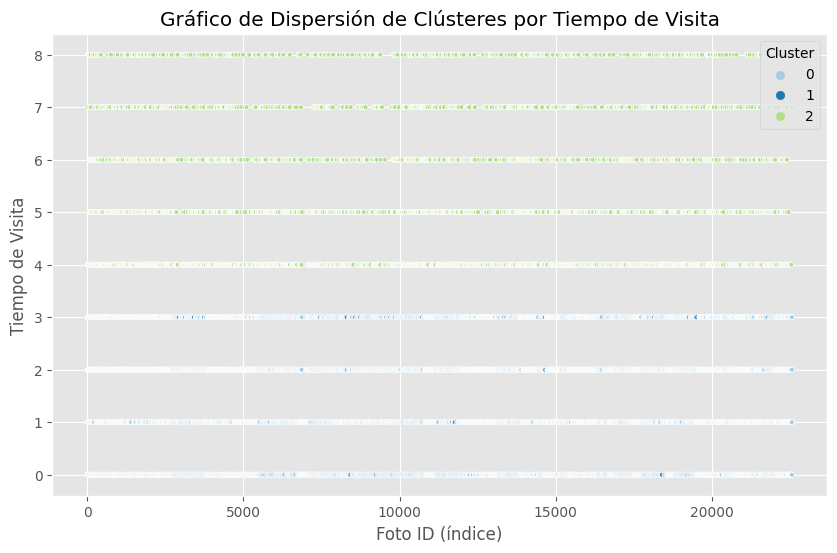

In [ ]:
import seaborn as sns

# Gráfico de dispersión con colores por clúster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cluster_images.index, y='Time Viewed', hue='Cluster', data=df_cluster_images, palette='Paired', marker='.', s=50)
plt.title('Gráfico de Dispersión de Clústeres por Tiempo de Visita')
plt.xlabel('Foto ID (índice)')
plt.ylabel('Tiempo de Visita')
plt.show()


En el gráfico de dispersión del tiempo de visita se observa que los tiempos de visita del cluster 2 son los mayores.

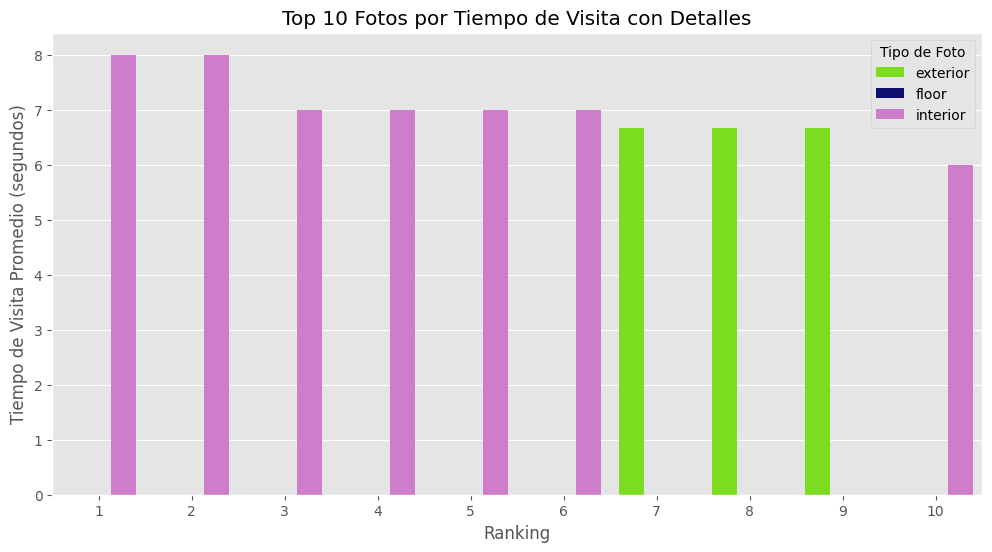

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fusionar el DataFrame del ranking con detalles
df_ranking_detallado = pd.merge(df_ranking, df1[['Photo ID', 'Photo Tag 1']], on='Photo ID', how='left')

# Filtrar las top N fotos para mayor claridad en el gráfico
top_n = 10
df_ranking_detallado_top = df_ranking_detallado.head(top_n)

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=df_ranking_detallado_top.index + 1, y='Tiempo de Visita Promedio', hue='Photo Tag 1', data=df_ranking_detallado_top)
plt.title(f'Top {top_n} Fotos por Tiempo de Visita con Detalles')
plt.xlabel('Ranking')
plt.ylabel('Tiempo de Visita Promedio (segundos)')
plt.legend(title='Tipo de Foto')
plt.show()


# **CONCLUSIÓN**

En base a estos hallazgos, podrías sugerir estrategias para mejorar la efectividad de la presentación de fotos en la plataforma. Por ejemplo, podrías recomendar ajustes en la disposición de las fotos según la dirección de visualización y resaltar las fotos que han demostrado atraer más tiempo de visita. Además, podrías proponer mejoras en la categorización de las fotos y en la presentación de clusters específicos para mejorar la experiencia del usuario.